<a href="https://colab.research.google.com/github/eftekhar-hossain/CONSTRAINT-AAAI2021/blob/main/Hindi_Hostilty_Detection_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import random
import re
%matplotlib inline
path = '/content/drive/My Drive/Colab Notebooks/NLP Projects/Constraint 2021/Hostility Detection/'
# importing MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

## Read Encoded Dataset

In [ ]:
train_dataset = pd.read_excel(path+'Constraint_Hindi_Train_Encoded.xlsx',index_col=[0])
test_dataset = pd.read_excel(path+'Constraint_Hindi_Valid_Encoded.xlsx',index_col=[0])

In [ ]:
train_dataset.columns

Index(['Unique ID', 'Post', 'Labels Set', 'defamation', 'fake', 'hate',
       'non-hostile', 'offensive'],
      dtype='object')

In [ ]:
# hostility labels
target_cols = ['defamation', 'fake', 'hate','non-hostile', 'offensive']

In [ ]:
test_dataset.head(10)

## Dataset Statistics

In [ ]:
def single_class_post_distribution(dataset,classes):
  number_of_comments = []
  for labels in classes:
    number_of_comments.append((labels, dataset[labels].sum()))
  stats = pd.DataFrame(number_of_comments,columns = ['class','number_of_posts'])
  return stats

In [ ]:
# training set
stats = single_class_post_distribution(train_dataset,target_cols)
#stats.head()

Text(0.5, 0, 'category')

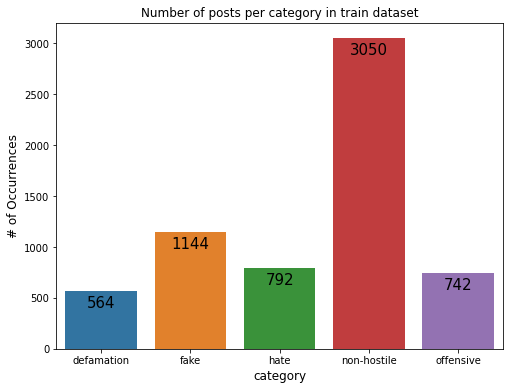

In [ ]:
# Barplot
plt.figure(figsize=(8,6))
splot = sns.barplot(x = 'class',y = 'number_of_posts',data = stats)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.title("Number of posts per category in train dataset")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)


In [ ]:
# Validation set
stats_test = single_class_post_distribution(test_dataset,target_cols)
#stats_val.head()

Text(0.5, 0, 'category')

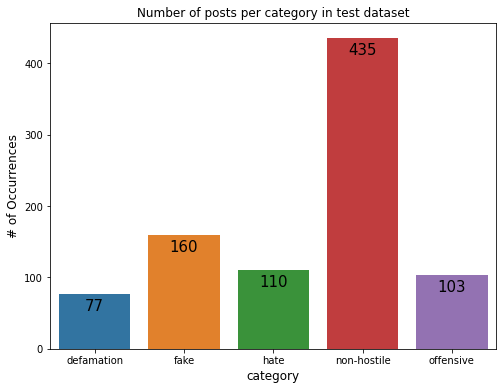

In [ ]:
# Barplot
plt.figure(figsize=(8,6))
splot = sns.barplot(x = 'class',y = 'number_of_posts',data = stats_val)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.title("Number of posts per category in test dataset")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)


### **How many posts have multiple category ?**

In [ ]:
def posts_with_multilabel (dataset,label):
  rowsums = dataset.iloc[:,3:].sum(axis=1)
  x=rowsums.value_counts()
  df = pd.DataFrame(x.values,columns = ['number_of_posts'])
  #plot
  plt.figure(figsize=(8,6))
  splot = sns.barplot(x = df.index, y= 'number_of_posts',data = df)
  for p in splot.patches:
      splot.annotate(format(p.get_height(), '1.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
  plt.title(f"Multiple categories per post ({label} Set)")
  plt.ylabel('# of Occurrences', fontsize=12)
  plt.xlabel('# of categories', fontsize=12)

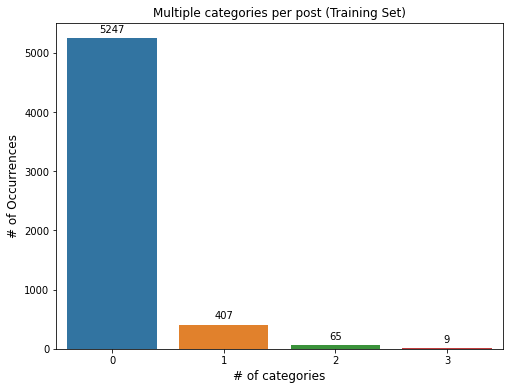

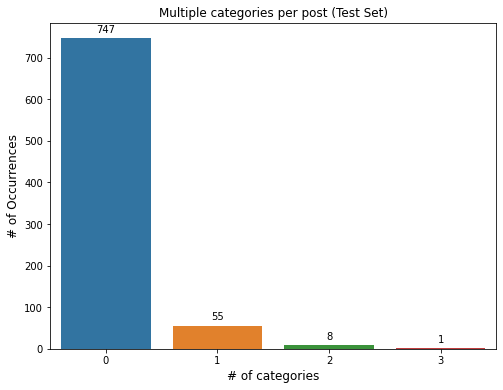

In [ ]:
datasets = [train_dataset,test_dataset]
label = ['Training', 'Test']

for i,dataset in enumerate(datasets):
    posts_with_multilabel (dataset,label[i])

In [ ]:
# check for any 'null' comment in the train dataset
no_comment = train_dataset[train_dataset['Post'].isnull()]
len(no_comment)

0

In [ ]:
# check for any 'null' comment in the train dataset
no_comment = test_dataset[test_dataset['Post'].isnull()]
len(no_comment)

0

In [ ]:
# let's see the total rows in train, test data and the numbers for the various categories
print('Total rows in train is {}'.format(len(train_dataset)))
print('Total rows in validation is {}'.format(len(test_dataset)))

Total rows in train is 5728
Total rows in validation is 811


## **Importing Original Dataset**

In [ ]:
# read the training dataset
dataset = pd.read_excel(path+'constraint_Hindi_Train.xlsx')
# read the validation dataset
test_dataset = pd.read_excel(path+'Constraint_Hindi_Valid.xlsx')
#dataset.head()

In [ ]:
dataset['Labels Set'].value_counts()

non-hostile                       3050
fake                              1008
hate                               478
offensive                          405
defamation                         305
hate,offensive                     163
defamation,offensive                81
defamation,hate                     74
defamation,fake                     34
defamation,hate,offensive           28
fake,offensive                      28
fake,hate                           27
defamation,fake,offensive           24
defamation,fake,hate                 9
defamation,fake,hate,offensive       9
fake,hate,offensive                  4
Name: Labels Set, dtype: int64

In [ ]:
# function to convert multilabels into one-hot-encoding
def multi_label_encoding(dataset):
  # converting the lables into list of array
  class_list = dataset['Labels Set'].apply(lambda x: list(x.split(",")))
  dataset['Labels'] = class_list
  return dataset


In [ ]:
train_dataset = multi_label_encoding(dataset)
test_dataset = multi_label_encoding(test_dataset)

In [ ]:
test_dataset.head()

,Unique ID,Post,Labels Set,Labels
0,1,दृढ़ इच्छा शक्ति से परिपूर्ण प्रणबदा के लिए दे...,non-hostile,[non-hostile]
1,2,भारतीय जनता पार्टी rss वाले इतने गिरे हुए हैं ...,defamation,[defamation]
2,3,कोरोना से निपटने की तैयारी / दिल्ली में 10 हजा...,non-hostile,[non-hostile]
3,4,गवर्नर कॉन्फ्रेंस में PM मोदी बोले- शिक्षा नीत...,non-hostile,[non-hostile]
4,5,"यूपी: गाजीपुर में Toilet घोटाला, प्रधान व सचिव...",non-hostile,[non-hostile]


###**Hindi Stopwords**

In [ ]:
# Read the stopwords txt file
stp = open(path+'hindi_stopwords.txt','r',encoding='utf-8').read().split()
num_of_stopwords = len(stp)
print(num_of_stopwords)
print(stp)

169
['अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'अंदर', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर', 'करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नके', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 

##**Data Cleaning**

In [ ]:
# Cleaning Data [Remove unncessary symbols]
def cleaning_data(row,removing_stopwords):
      post = row.replace('\n', ' ') #removing new line 
      post = row.replace('।', ' ') #removing daari 
      post = re.sub('[^\u0900-\u097F]',' ',str(post)) #removing unnecessary punctuation
      if removing_stopwords == True:
        stp = open(path+'hindi_stopwords.txt','r',encoding='utf-8').read().split() # Stopwords
        result = post.split()
        post = [word.strip() for word in result if word not in stp ]
        post =" ".join(post)
      return post

In [ ]:
# Apply the function into the train dataset
train_dataset['cleaned'] = train_dataset['Post'].apply(cleaning_data,removing_stopwords = False)  
#Let's look at the number empty strings occur after cleaning
train_dataset['cleaned'].replace(r'^\s*$', np.NaN, regex=True,inplace = True)
train_dataset.dropna(subset=['cleaned'], inplace=True)
train_dataset = train_dataset.reset_index(drop=True)
print('After Removing empty strings Total rows in train is {}'.format(len(train_dataset)))


After Removing empty strings Total rows in train is 5727


In [ ]:
#Generate 50 random numbers between 10 and 5000
randomlist = random.sample(range(10, 5000), 50)
for i in randomlist:
  print(f'Post No- {i}\n', 'Original --\n', train_dataset['Post'][i],'\n',
        'Cleaned --\n',train_dataset['cleaned'][i],'\n')

In [ ]:
# Apply the function into the validation dataset
test_dataset['cleaned'] = test_dataset['Post'].apply(cleaning_data,removing_stopwords = False)  
import random
#Generate 50 random numbers between 10 and 5000
randomlist = random.sample(range(10, 800), 50)

for i in randomlist:
  print(f'Post No- {i}\n', 'Original --\n', test_dataset['Post'][i],'\n',
        'Cleaned --\n',test_dataset['cleaned'][i],'\n')

##Length Distribution

In [ ]:
def post_length_distribution(dataset,label,verbose):
  dataset['cleaned'] = dataset['Post'].apply(cleaning_data,removing_stopwords = verbose)  
  #Let's look at the number empty strings occur after cleaning
  dataset['cleaned'].replace(r'^\s*$', np.NaN, regex=True,inplace = True)
  dataset.dropna(subset=['cleaned'], inplace=True)
  new_dataset = dataset.reset_index(drop=True)
  # Let's look at the character length for the rows in the training data and record these
  new_dataset['char_length'] = new_dataset['cleaned'].apply(lambda x: len(str(x)))
  # look at the distribution plot for text length
  import matplotlib
  matplotlib.rc_file_defaults()
  frequency = dict()
  for i in new_dataset.char_length:
      frequency[i] = frequency.get(i, 0)+1
  print(f"{label} Dataset\n")
  #print(f"Remove {len(new_dataset.loc[new_dataset.char_length<1])} empty strings")
  plt.figure(figsize = (6,4))
  plt.bar(frequency.keys(), frequency.values(), color ="b")
  plt.xlim(0, 500)
  plt.xlabel('Length of the posts')
  plt.ylabel('Frequency')
  if verbose == True:
    plt.title(f'Post Length-Frequency Distribution (without stowords))')
  else:
    plt.title(f'Post Length-Frequency Distribution (with stowords))')  
  #plt.savefig(path+'len_dist.png',dpi = 1000,bbox_inches ='tight')
  plt.show()  

  print(f"Maximum Length of a Post: {max(new_dataset.char_length)}")
  print(f"Minimum Length of a Post: {min(new_dataset.char_length)}")
  print(f"Average Length of a Post: {round(np.mean(new_dataset.char_length),0)}")

Training Dataset



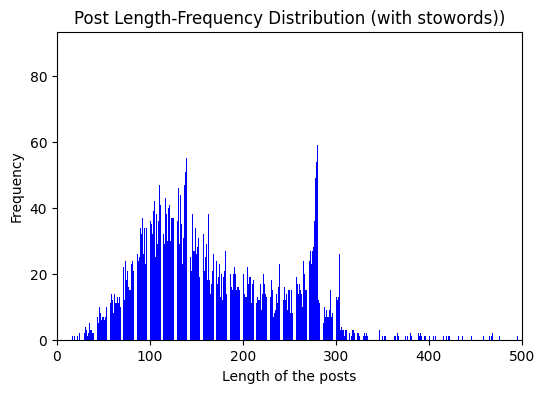

Maximum Length of a Post: 2325
Minimum Length of a Post: 17
Average Length of a Post: 170.0
Training Dataset



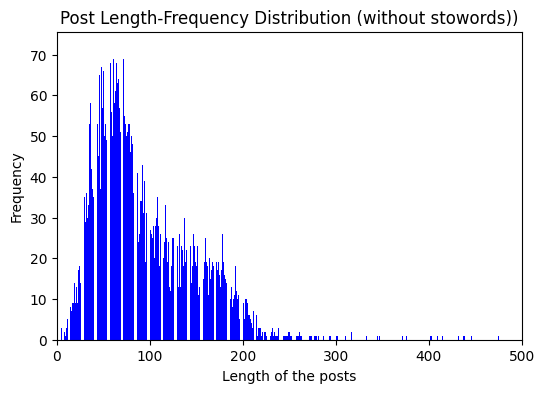

Maximum Length of a Post: 1231
Minimum Length of a Post: 5
Average Length of a Post: 96.0


In [ ]:
# Find length- frequency distribution for training dataset
verbose =  [False,True]
for i in verbose:
    post_length_distribution(train_dataset,'Training',i)

Test Dataset



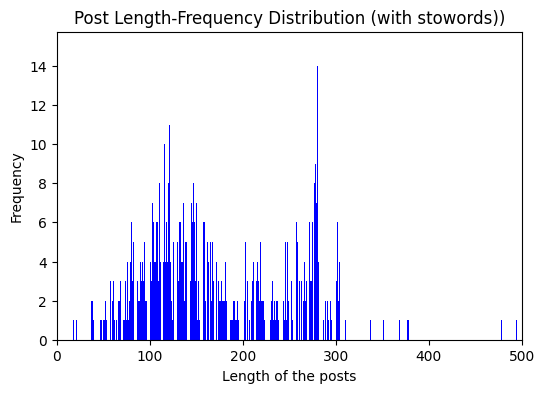

Maximum Length of a Post: 615
Minimum Length of a Post: 18
Average Length of a Post: 170.0
Test Dataset



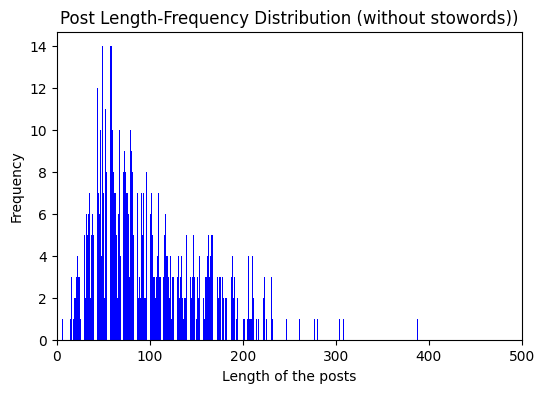

Maximum Length of a Post: 413
Minimum Length of a Post: 6
Average Length of a Post: 97.0


In [ ]:
# Find length- frequency distribution for test dataset
verbose =  [False,True]
for i in verbose:
    post_length_distribution(test_dataset,'Test',i)

###**Number of comments classified as defamation, fake, non-hostile,....etc depending on their lengths**

In [ ]:
def comments_length_per_class(dataset,set_name):
  label = dataset[['defamation', 'fake' , 'hate' , 'non-hostile' , 'offensive']]
  label = label.values
  comment = dataset['Post']
  comment = comment.values
  y = np.zeros(label.shape)
  for ix in range(comment.shape[0]):
      l = len(comment[ix].split())
      if label[ix][0] :
          y[ix][0] = l
      if label[ix][1] :
          y[ix][1] = l
      if label[ix][2] :
          y[ix][2] = l
      if label[ix][3] :
          y[ix][3] = l
      if label[ix][4] :
          y[ix][4] = l

  labelsplt = target_cols
  color = ['red','green','blue','yellow','chartreuse']    
  bins = [1,20,40,60,80]    
  #plt.title (f'Comments Length Per Class ({set_name} Set)')
  plt.figure(figsize=(5,3))
  #plt.title ('Posts Length Per Class')
  plt.hist(y,bins = bins,label = labelsplt,color = color)
  plt.axis([0, 90, 0, 1500])
  plt.xlabel('Length of posts')
  plt.ylabel('Number of posts') 
  plt.legend()
  plt.savefig(path+'hostile_no_title.png',dpi = 600,bbox_inches ='tight')
  #plt.grid(True)
  plt.show()

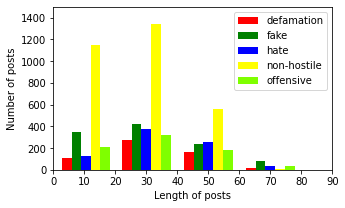

In [ ]:
comments_length_per_class(train_dataset,'Training')

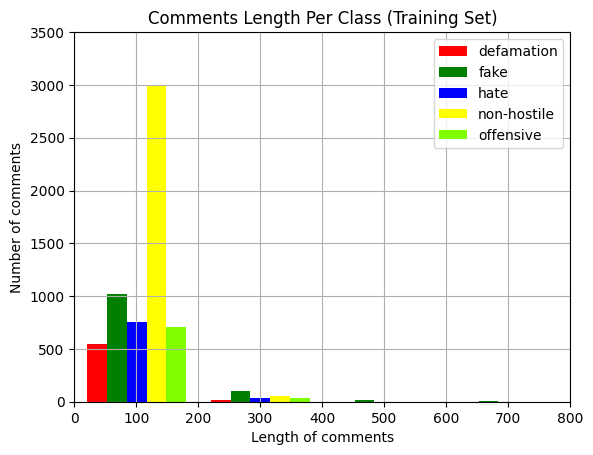

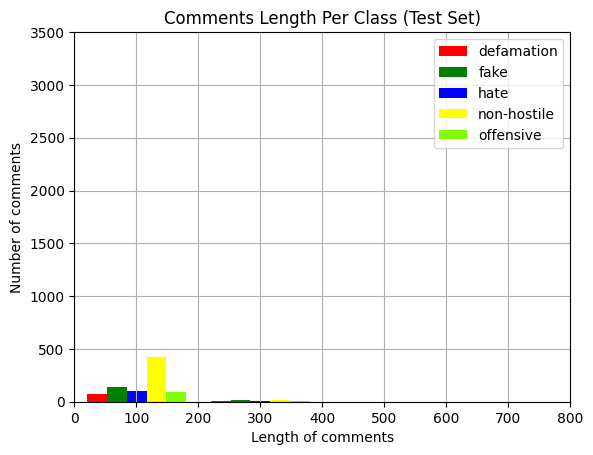

In [ ]:
# Apply the function on two set
datasets = [train_dataset,test_dataset]
label =  ['Training', 'Test']

for i, dataset in enumerate(datasets):
    comments_length_per_class(dataset,label[i])


In [ ]:
train_dataset[train_dataset['fake']==1].cleaned

5       चीन तर्क भारत विपक्ष अजर मसुद आतंकी मानता हम क...
15      कांग्रेस मूल कंगना रनौत बिहार चुनाव भाजपा प्रच...
20      जापान नोबल पुरस्कार जीतने ओर साल चीन काम प्रोफ...
21      दिल्ली हिंदुओं सिक्खों सामूहिक हत्याएं आतंकवाद...
26                      गृह मंत्री अमित शाह बोन कैंसर जूझ
                              ...                        
5705    मानव मल मिलाकर खाना परोसने मोहम्मद अब्दुल बासि...
5712    कोरोनावायरस रोगियों क्रिस्टियानो रोनाल्डो होटल...
5713    एनएसए अजीत डोभाल स्वीकार लिया चीनी सैनिकों भार...
5717    संघी ब्रांड गाँधी जी पुतले गोली चलाने वाली हिन...
5725    बंगाल हिन्दू मरे इसलिए मुझे फर्क पड़ता रविश कुमार
Name: cleaned, Length: 1143, dtype: object

## Word Distribution Per Class

In [ ]:
def char_length(row):
    return len(row.split())

In [ ]:
lables = ['defamation', 'fake' , 'hate' , 'non-hostile' , 'offensive']

# Count number of unique words in each set
def dataset_statistics(dataset):
  for l in lables:
    word_list = [word.strip() for t in list(dataset[dataset[l]==1].cleaned) for word in t.strip().split()]
    print(f"\nClass Name:--> {l} ") 
    print("Number of Words:{}".format(len(word_list))) 
    print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
    print("Maximum post length: {}".format(max(dataset[dataset[l]==1].cleaned.apply(char_length))))
    print("Average Words in texts: {}".format(np.mean(dataset[dataset[l]==1].cleaned.apply(char_length))))
    

In [ ]:
dataset_statistics(train_dataset)


Class Name:--> defamation 
Number of Words:17287
Number of Unique Words:4051
Maximum post length: 69
Average Words in texts: 30.650709219858157

Class Name:--> fake 
Number of Words:40265
Number of Unique Words:7129
Maximum post length: 403
Average Words in texts: 35.22747156605424

Class Name:--> hate 
Number of Words:25982
Number of Unique Words:5101
Maximum post length: 116
Average Words in texts: 32.80555555555556

Class Name:--> non-hostile 
Number of Words:69481
Number of Unique Words:9485
Maximum post length: 60
Average Words in texts: 22.78065573770492

Class Name:--> offensive 
Number of Words:21520
Number of Unique Words:4624
Maximum post length: 123
Average Words in texts: 29.002695417789756


##**Word Distribution**

In [ ]:
# Count number of unique words in each set
def word_count(dataset, set_name):
  word_list = [word.strip() for t in list(dataset.cleaned) for word in t.strip().split()]
  print(f"\n{set_name} Set") 
  print("Number of Words:{}".format(len(word_list))) 
  print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
  counts = dict()
  for word in word_list:
    counts[word] = counts.get(word, 0)+1

  ordered = sorted(counts.items(), key= lambda item: item[1], reverse = True)

  print("Most Frequent Words:\n")
  for k,v in ordered[:10]:
      print("{}\t{}".format(k,v))    

In [ ]:
# Apply the function on two set
datasets = [train_dataset,test_dataset]
label = ['Training', 'Test']

for i, dataset in enumerate(datasets):
  word_count(dataset,label[i])



Training Set
Number of Words:94091
Number of Unique Words:15778
Most Frequent Words:

भारत	657
देश	560
जी	530
क्या	520
अब	466
कोरोना	435
रही	407
सरकार	403
आज	382
मोदी	335

Test Set
Number of Words:13565
Number of Unique Words:5146
Most Frequent Words:

भारत	80
जी	78
देश	75
क्या	69
कोरोना	68
सरकार	66
रही	65
आज	61
गई	54
अब	53
